# Aula12_analise_clusters_kmeans

Diferenças entre k-means clusters e clusters hierarquicos:
- K-Means é mais arbitrário, fruto de um processamento de aproximações de variância dadas de acordo com o número de clusters que o pesquisador sugere (geralmente, baseado em resultados de variâncias explicadas/autovalores presentes em um elbow plot);
- clusters hierarquicos devolvem ao pesquisador, de maneira pareada, quais são as categorias com maior verossimilhança do início ao fim da "hierarquia" (sequencia de achados) de maior aproximação.


In [41]:
library(tidyverse)
library(FactoMineR)
library(stats)
library(car)
library(scatterplot3d)


#### 1. Análise de ACM tradicional (variáveis inspiradas no banco de dados do Nusp-Observatório das Elites Políticas e Sociais do Brasil

Amostra de 173 casos de prefeitos eleitos nas eleições de 2016.

Variáveis interdependentes sob análise:

- Se o prefeito eleito tem imóvel para moradia (sim ou não);
- qual o nível de poupança/investimentos possuído pelo eleito (quatro categorias: 'sem_titulo', 'ate_120mil', 'de_120_a_530' e 'mais_de_530');
- autodeclaração profissional (seis categorias: 'camadas_medias', 'empresarios_urbanos_e_rurais', 'politicos', 'outras_ocupacoes', 'trabalhadores' e 'novas_liderancas');
- classificação ideológica (três categorias: 'esquerda', 'centro' e 'direita');
- período de socialização de cada indivíduo em vida adulta ('democ_populista', 'ditadura_militar', 'transicao_e_retorno_democratico', 'governos_cardoso' e 'governos_PT').

In [80]:
df <- read_csv("Aula12_kmeans.csv")

unique(df$imovel_para_moradia)
unique(df$nivel_poupanca_investimentos)
unique(df$classe_profissional)
unique(df$ideologia)
unique(df$socializacao_em_vida_adulta)
df


Parsed with column specification:
cols(
  caso = col_integer(),
  imovel_para_moradia = col_character(),
  nivel_poupanca_investimentos = col_character(),
  classe_profissional = col_character(),
  ideologia = col_character(),
  socializacao_em_vida_adulta = col_character()
)


[1] "nao" "sim"

[1] "ate_120mil"   "de_120_a_530" "sem_titulo"   "mais_de_530"

[1] "camadas_medias"               "empresarios_urbanos_e_rurais"
[3] "politicos"                    "outras_ocupacoes"            
[5] "trabalhadores"                "novas_liderancas"

[1] "centro"   "direita"  "esquerda"

[1] "transicao_e_retorno_democratico" "democ_populista"                
[3] "ditadura_militar"                "governos_cardoso"               
[5] "governos_PT"

caso,imovel_para_moradia,nivel_poupanca_investimentos,classe_profissional,ideologia,socializacao_em_vida_adulta
1,nao,ate_120mil,camadas_medias,centro,transicao_e_retorno_democratico
2,sim,de_120_a_530,camadas_medias,centro,transicao_e_retorno_democratico
3,sim,sem_titulo,camadas_medias,direita,transicao_e_retorno_democratico
4,sim,sem_titulo,camadas_medias,direita,transicao_e_retorno_democratico
5,sim,de_120_a_530,empresarios_urbanos_e_rurais,centro,transicao_e_retorno_democratico
6,sim,sem_titulo,empresarios_urbanos_e_rurais,centro,transicao_e_retorno_democratico
7,nao,ate_120mil,politicos,centro,transicao_e_retorno_democratico
8,sim,de_120_a_530,politicos,centro,transicao_e_retorno_democratico
9,nao,ate_120mil,camadas_medias,direita,transicao_e_retorno_democratico
10,nao,mais_de_530,camadas_medias,direita,transicao_e_retorno_democratico


In [3]:
acm <- data.frame(df$imovel_para_moradia, df$nivel_poupanca_investimentos, df$ideologia, df$socializacao_em_vida_adulta)

result <- MCA(acm, ncp = 8, ind.sup = 1, quanti.sup = NULL, 
               quali.sup = NULL, excl=NULL, graph = TRUE, 
               level.ventil = 0, axes = c(1,2), row.w = NULL, 
               method="Indicator", na.method="NA", tab.disj=NULL)
result


**Results of the Multiple Correspondence Analysis (MCA)**
The analysis was performed on 173 individuals, described by 4 variables
*The results are available in the following objects:

   name              description                                
1  "$eig"            "eigenvalues"                              
2  "$var"            "results for the variables"                
3  "$var$coord"      "coord. of the categories"                 
4  "$var$cos2"       "cos2 for the categories"                  
5  "$var$contrib"    "contributions of the categories"          
6  "$var$v.test"     "v-test for the categories"                
7  "$ind"            "results for the individuals"              
8  "$ind$coord"      "coord. for the individuals"               
9  "$ind$cos2"       "cos2 for the individuals"                 
10 "$ind$contrib"    "contributions of the individuals"         
11 "$ind.sup"        "results for the supplementary individuals"
12 "$ind.sup$coord"  "coord. for the

##### Banco proveniente da redução de dimensionalidade e análise das contribuições das categorias (agora variáveis) para cada uma das dimensões -- quando MAIS ALTO O VALOR DE CONTRIBUIÇÃO, MAIS ASSOCIADA A VARIÁVEL/CATEGORIA À DIMENSÃO (importante para análise de quem busca detalhar aspectos relativos de variável):

In [88]:
dfacm <- as.data.frame(result$var$coord)
dfacm

contribuicoes_var <- as.data.frame(result$var$contrib)
contribuicoes_var

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5,Dim 6,Dim 7,Dim 8
nao,1.0052047,0.10366717,0.0309300,0.146275303,-0.49854101,0.27702586,0.91287438,-0.036950191
sim,-0.4355887,-0.04492244,-0.0134030,-0.063385964,0.21603444,-0.12004454,-0.39557890,0.016011750
ate_120mil,-0.1283092,-0.28338818,-0.6244398,-0.533877266,0.09331161,0.42544614,0.20769080,0.337651141
de_120_a_530,0.4395693,-0.63728701,0.1125147,1.266615879,-0.69582319,-0.81447524,-0.41237300,0.513882425
mais_de_530,1.0713391,0.76378245,1.0246180,-0.574071610,0.32299405,0.23628344,-0.85021931,-0.446419776
sem_titulo,-1.2523219,0.77734554,0.5406485,0.499752583,0.26259885,-0.41227004,0.78213246,-1.093591431
centro,0.1072398,-1.19887826,0.6627696,-0.018352584,0.33819209,-0.41641587,0.34184054,-0.116929486
direita,-0.3712936,0.40309920,0.3555262,-0.005263583,-0.90691566,0.55581654,-0.25514010,0.006878604
esquerda,0.2946382,0.39620641,-0.7885041,0.017323545,0.66923604,-0.27179040,0.02507420,0.070580573
democ_populista,2.5281910,1.27521558,1.2881506,0.289568556,1.04814230,-0.04079481,0.09275323,0.570787828


,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5,Dim 6,Dim 7,Dim 8
nao,17.9192854,0.22505629,0.021045839,5.635378e-01,7.521344,2.795115366,34.044458173,0.061378661
sim,7.7650237,0.09752439,0.009119863,2.441997e-01,3.259249,1.211216659,14.752598542,0.026597420
ate_120mil,0.4435586,2.55502926,13.032007281,1.140480e+01,0.400303,10.015486387,2.677211436,7.786534531
de_120_a_530,2.3063812,5.72457816,0.187451746,2.844039e+01,9.861800,16.262211555,4.675946471,7.990542273
mais_de_530,11.3516829,6.81306696,12.880273274,4.840697e+00,1.760668,1.134019092,16.469521329,4.996495808
sem_titulo,15.5109447,7.05718561,3.586171803,3.668477e+00,1.163788,3.452369972,13.937332871,29.983952059
centro,0.1686509,24.88994518,7.990917903,7.335684e-03,2.862106,5.222504106,3.947631813,0.508273203
direita,3.0090079,4.18802396,3.422363834,8.980917e-04,30.634028,13.848370977,3.273093890,0.002617949
esquerda,1.9244196,4.10924145,17.097174433,9.880174e-03,16.941908,3.363081290,0.032106178,0.279939639
democ_populista,23.9784322,7.20385927,7.721986498,4.671681e-01,7.032723,0.012822073,0.074348440,3.098295033


#### 2. Avaliação de Elbow Plot: quando menos dimensões contemplar, melhor o ajuste sobre os valores individuais (porém menor o percentual de variância explicada) ATENÇÃO, MUITO IMPORTANTE PARA A ANÁLISE DE CLUSTERS)

,autovalores,porcent_variancia,porcent_acum_variancia
dim 1,0.4261900,17.047599,17.04760
dim 2,0.3609161,14.436644,31.48424
dim 3,0.3435646,13.742586,45.22683
dim 4,0.2869682,11.478730,56.70556
dim 5,0.2497590,9.990362,66.69592
dim 6,0.2075180,8.300720,74.99664
dim 7,0.1850080,7.400320,82.39696
dim 8,0.1681245,6.724978,89.12194
dim 9,0.1553937,6.215749,95.33769
dim 10,0.1165578,4.662312,100.00000


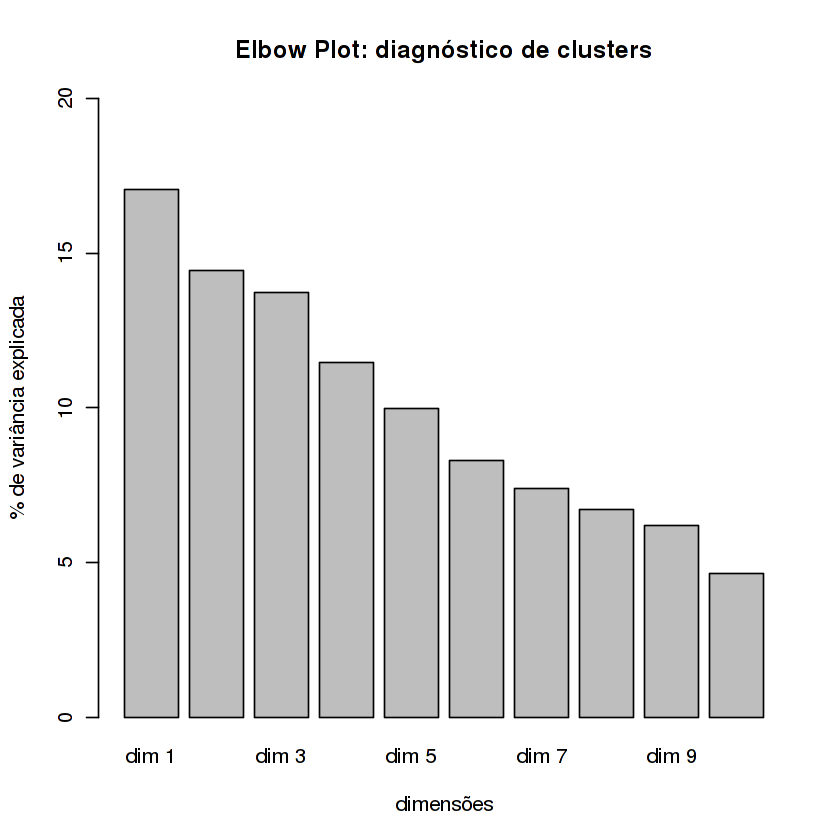

In [87]:
an_var_autovalores <- as.data.frame(result$eig)
colnames(an_var_autovalores)[1] <- "autovalores"
colnames(an_var_autovalores)[2] <- "porcent_variancia"
colnames(an_var_autovalores)[3] <- "porcent_acum_variancia"
an_var_autovalores

barplot(height=an_var_autovalores$porcent_variancia, names=rownames(an_var_autovalores), 
        xlab="dimensões", 
        ylab="% de variância explicada", 
        main="Elbow Plot: diagnóstico de clusters", 
        ylim=c(0,20)
        )

#### 3. Análise das dispersões das variáveis  e suas interdependências:

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5,Dim 6,Dim 7,Dim 8
nao,1.0052047,0.10366717,0.0309300,0.146275303,-0.49854101,0.27702586,0.91287438,-0.036950191
sim,-0.4355887,-0.04492244,-0.0134030,-0.063385964,0.21603444,-0.12004454,-0.39557890,0.016011750
ate_120mil,-0.1283092,-0.28338818,-0.6244398,-0.533877266,0.09331161,0.42544614,0.20769080,0.337651141
de_120_a_530,0.4395693,-0.63728701,0.1125147,1.266615879,-0.69582319,-0.81447524,-0.41237300,0.513882425
mais_de_530,1.0713391,0.76378245,1.0246180,-0.574071610,0.32299405,0.23628344,-0.85021931,-0.446419776
sem_titulo,-1.2523219,0.77734554,0.5406485,0.499752583,0.26259885,-0.41227004,0.78213246,-1.093591431
centro,0.1072398,-1.19887826,0.6627696,-0.018352584,0.33819209,-0.41641587,0.34184054,-0.116929486
direita,-0.3712936,0.40309920,0.3555262,-0.005263583,-0.90691566,0.55581654,-0.25514010,0.006878604
esquerda,0.2946382,0.39620641,-0.7885041,0.017323545,0.66923604,-0.27179040,0.02507420,0.070580573
democ_populista,2.5281910,1.27521558,1.2881506,0.289568556,1.04814230,-0.04079481,0.09275323,0.570787828


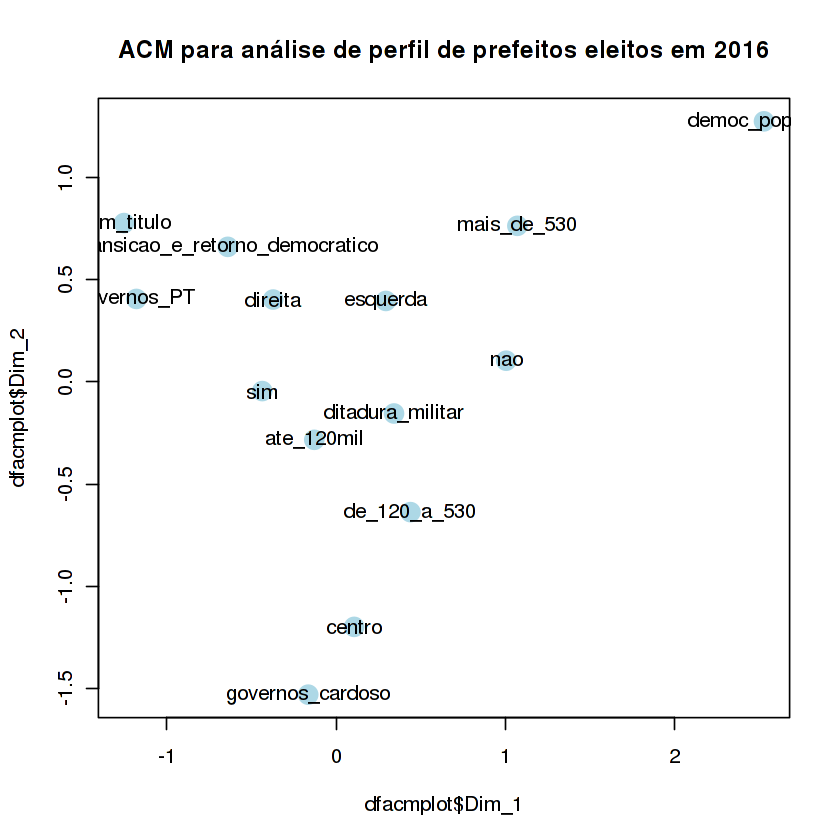

In [54]:
dfacmplot <- as.data.frame(dfacm)
labels <- rownames(dfacmplot)
dfacmplot

colnames(dfacmplot)[1] <- "Dim_1"
colnames(dfacmplot)[2] <- "Dim_2"
colnames(dfacmplot)[3] <- "Dim_3"
plot(dfacmplot$Dim_1, dfacmplot$Dim_2, main= "ACM para análise de perfil de prefeitos eleitos em 2016", col="lightblue", pch=19, cex=2)
text(dfacmplot$Dim_1, dfacmplot$Dim_2, labels=labels, cex= 1)


#### Gráfico em 3d para se ter noção da redução de dimensionalidade:

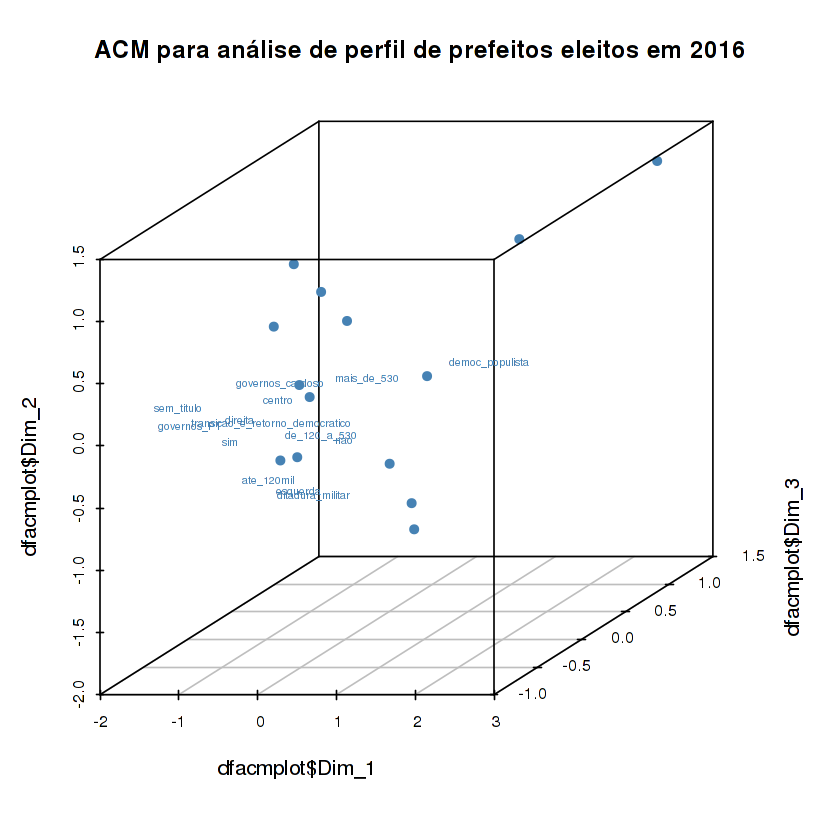

In [64]:
scatterplot3d(dfacmplot$Dim_1, dfacmplot$Dim_3, dfacmplot$Dim_2, main= "ACM para análise de perfil de prefeitos eleitos em 2016", , pch = 16, color="steelblue")
text(dfacmplot$Dim_1, dfacmplot$Dim_3, dfacmplot$Dim_2, labels = rownames(dfacmplot),
     cex= 0.5, col = "steelblue")



##  Processamento de clusters 

Programando funções... (by Kassio Ferreira em https://rpubs.com/Kassio_Ferreira/kmeans)

In [66]:
kMeans1 <- function(dados, k=2){
  
  # função que calcula a distância euclidiana
  euc.dist <- function(x1, x2) sum((x1 - x2) ^ 2)
  
  # labels
  rotulo = 1:k
  rownames(dados)[nrow(dados)]= 1
  
  # random centroids
  for(i in 1:nrow(dados)){
    rownames(dados)[i] <- sample(rotulo,1)
  }
  
  centroids <- colMeans(dados[rownames(dados) == 1, ])
  
  for(j in 2:k){
    centroids <- rbind(centroids, colMeans(dados[rownames(dados) == j, ]))
  }

  rownames(centroids) = 1:k #  identifica o centroide de cada grupo

  for(i in 1:nrow(dados)){
    distancias = NULL
    for(j in 1:k){
      distancias[j] = euc.dist(dados[i,], centroids[j,])
    }
    names(distancias) = 1:k
 #   print(distancias)
    rownames(dados)[i] = as.numeric(names(distancias[distancias == min(distancias)]))
    
    # recalcula as medias
    
     centroids <- colMeans(dados[rownames(dados) == 1, ])
     
     for(z in 2:k){
       centroids <- rbind(centroids, colMeans(dados[rownames(dados) == z, ]))
     }
    
    
  }
#  centroids
  
  return(list(centroides = centroids, grupo1 = dados[rownames(dados) == 1, ],
              grupo2 = dados[rownames(dados) == 2, ],
              grupo3 = dados[rownames(dados) == 3, ],
              clusters = as.numeric(rownames(dados))))
}

### Análise dos dados com 2 Clusters:

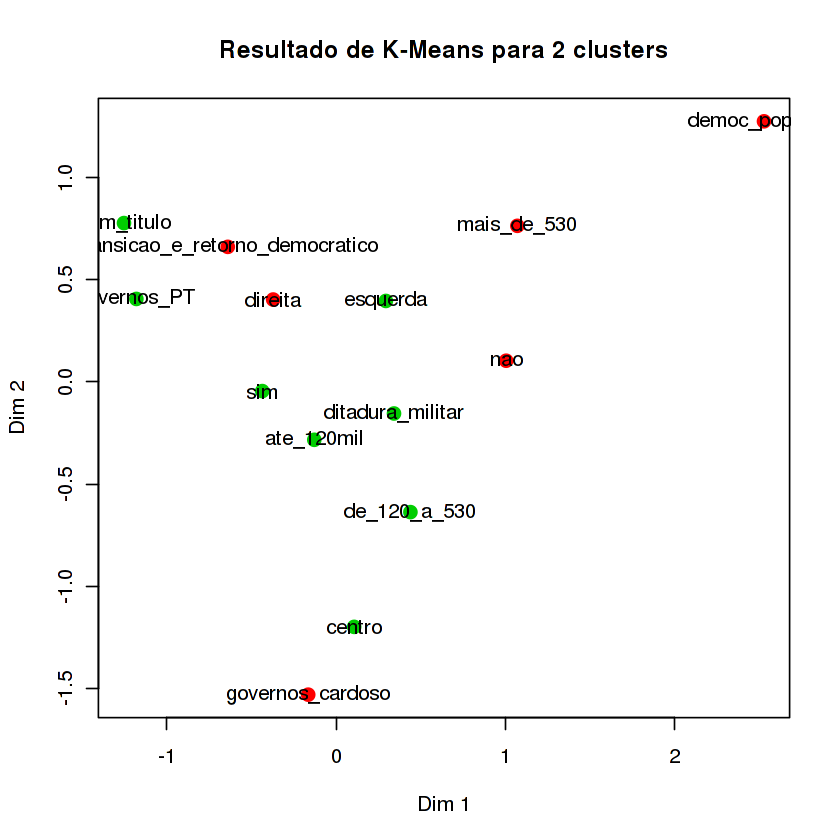

In [67]:
dados = as.matrix(dfacm) 
exemplo = kMeans1(dados, k=2)

plot(dados,col = exemplo$clusters+1,  main="Resultado de K-Means para 2 clusters", pch=20, cex=2)
text(dfacmplot$Dim_1, dfacmplot$Dim_2, labels=labels, cex= 1)

### Análise dos dados com 3 Clusters:

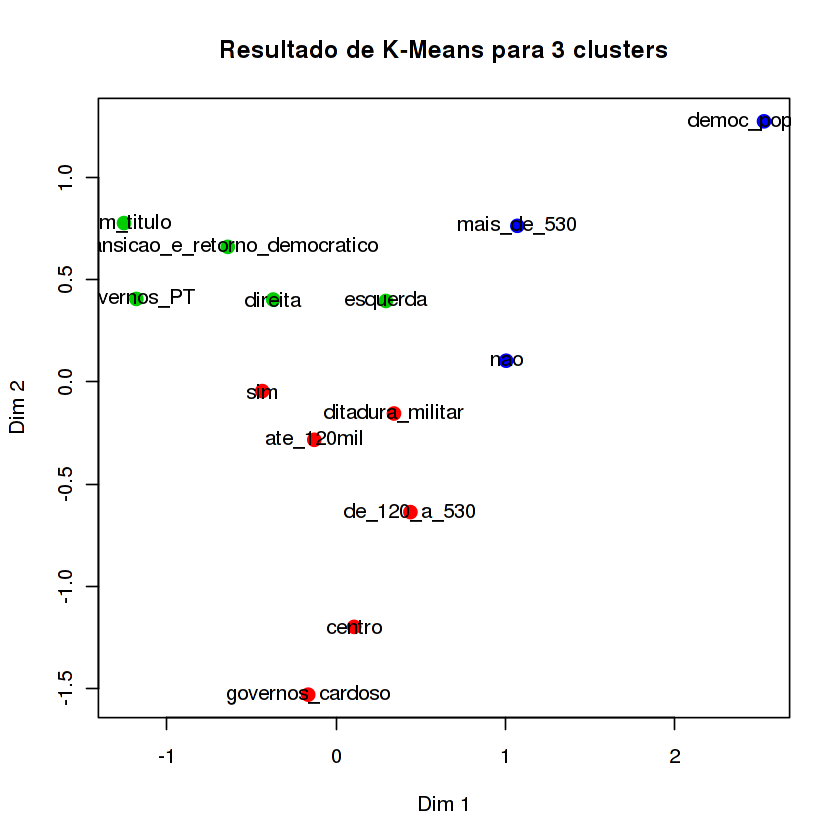

In [69]:
dados = as.matrix(dfacm) 
exemplo = kMeans1(dados, k=3)

plot(dados,col = exemplo$clusters+1,  main="Resultado de K-Means para 3 clusters", pch=20, cex=2)
text(dfacmplot$Dim_1, dfacmplot$Dim_2, labels=labels, cex= 1)

### Análise dos dados com 4 Clusters:

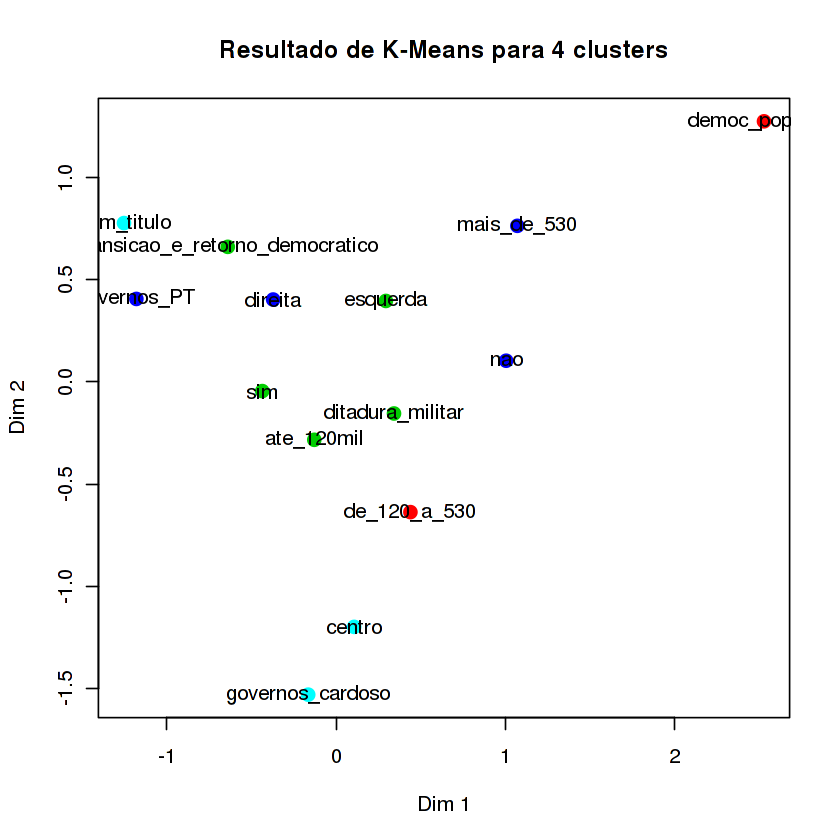

In [73]:
dados = as.matrix(dfacm) 
exemplo = kMeans1(dados, k=4)

plot(dados,col = exemplo$clusters+1,  main="Resultado de K-Means para 4 clusters", pch=20, cex=2)
text(dfacmplot$Dim_1, dfacmplot$Dim_2, labels=labels, cex= 1)

### Análise dos dados com 5 Clusters:

In [75]:
dados = as.matrix(dfacm) 
exemplo = kMeans1(dados, k=5)

plot(dados,col = exemplo$clusters+1,  main="Resultado de K-Means para 5 clusters", pch=20, cex=2)
text(dfacmplot$Dim_1, dfacmplot$Dim_2, labels=labels, cex= 1)

ERROR: Error in colMeans(dados[rownames(dados) == j, ]): 'x' must be an array of at least two dimensions
